In [2]:
#Import all libraries
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default = 'warn'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
# Modeling & Accuracy Metrics
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
pd.options.mode.chained_assignment = None  # default = 'warn'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from matplotlib import pyplot

In [3]:
main_df=pd.read_csv('1806186.csv')
main_df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U002,0200825136,COLOME corporation,2019-03-22 00:00:00,2019.0,1.990565e+09,2019-02-23,20190219,20190223,20190325.0,USD,RV,1.0,NaN,68916.81,20190223.0,NA38,1.990565e+09,0
1,U001,0200780383,MEIJ in,2019-03-28 00:00:00,2019.0,1.928940e+09,2019-03-11,20190310,20190311,20190326.0,USD,RV,1.0,NaN,2214.71,20190311.0,NAA8,1.928940e+09,0
2,U001,0200752302,KROGER systems,2019-03-18 00:00:00,2019.0,1.928890e+09,2019-03-02,20190302,20190302,20190317.0,USD,RV,1.0,NaN,53303.36,20190302.0,NAA8,1.928890e+09,0
3,U001,0200781803,JRD corporation,2019-11-04 00:00:00,2019.0,1.930014e+09,2019-10-14,20191015,20191014,20191103.0,USD,RV,1.0,NaN,8366.84,20191014.0,NAD1,1.930014e+09,0
4,U001,0200750051,ALBER foundation,2020-03-04 00:00:00,2020.0,1.930543e+09,2020-02-18,20200219,20200218,20200304.0,USD,RV,1.0,NaN,61587.33,20200218.0,NAA8,1.930543e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200936373,SUPE corp,NaN,2020.0,1.930730e+09,2020-03-31,20200401,20200331,20200415.0,USD,RV,1.0,NaN,78043.37,20200331.0,NAA8,1.930730e+09,1
49996,U001,200769623,WAL-MAR in,NaN,2020.0,1.930676e+09,2020-03-20,20200320,20200320,20200404.0,USD,RV,1.0,NaN,16897.41,20200320.0,NAH4,1.930676e+09,1
49997,U001,0200974851,RESTA corporation,NaN,2020.0,1.930726e+09,2020-04-01,20200331,20200401,20200416.0,USD,RV,1.0,NaN,3012.91,20200401.0,NAA8,1.930726e+09,1
49998,U001,0200331749,SYSC associates,NaN,2020.0,1.930811e+09,2020-04-28,20200421,20200428,20200513.0,USD,RV,1.0,NaN,8198.15,20200428.0,NAA8,1.930811e+09,1


In [4]:
main_df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [5]:
main_df.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [6]:
#Converting to Date Time datatype
main_df['due_in_date'] = pd.to_datetime(main_df['due_in_date'].astype(str), format='%Y%m%d')
main_df['due_in_date'].dt.date

main_df['clear_date'] = pd.to_datetime(main_df['clear_date'])
main_df['clear_date'].dt.date

main_df['document_create_date'] = pd.to_datetime(main_df['document_create_date'], format='%Y%m%d')
main_df['document_create_date'].dt.date

main_df['document_create_date.1'] = pd.to_datetime(main_df['document_create_date.1'], format='%Y%m%d')
main_df['document_create_date.1'].dt.date

main_df['baseline_create_date'] = pd.to_datetime(main_df['baseline_create_date'], format='%Y%m%d')
main_df['baseline_create_date'].dt.date

0        2019-02-23
1        2019-03-11
2        2019-03-02
3        2019-10-14
4        2020-02-18
            ...    
49995    2020-03-31
49996    2020-03-20
49997    2020-04-01
49998    2020-04-28
49999    2020-03-19
Name: baseline_create_date, Length: 50000, dtype: object

In [7]:
main_df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U002,0200825136,COLOME corporation,2019-03-22,2019.0,1.990565e+09,2019-02-23,2019-02-19,2019-02-23,2019-03-25,USD,RV,1.0,NaN,68916.81,2019-02-23,NA38,1.990565e+09,0
1,U001,0200780383,MEIJ in,2019-03-28,2019.0,1.928940e+09,2019-03-11,2019-03-10,2019-03-11,2019-03-26,USD,RV,1.0,NaN,2214.71,2019-03-11,NAA8,1.928940e+09,0
2,U001,0200752302,KROGER systems,2019-03-18,2019.0,1.928890e+09,2019-03-02,2019-03-02,2019-03-02,2019-03-17,USD,RV,1.0,NaN,53303.36,2019-03-02,NAA8,1.928890e+09,0
3,U001,0200781803,JRD corporation,2019-11-04,2019.0,1.930014e+09,2019-10-14,2019-10-15,2019-10-14,2019-11-03,USD,RV,1.0,NaN,8366.84,2019-10-14,NAD1,1.930014e+09,0
4,U001,0200750051,ALBER foundation,2020-03-04,2020.0,1.930543e+09,2020-02-18,2020-02-19,2020-02-18,2020-03-04,USD,RV,1.0,NaN,61587.33,2020-02-18,NAA8,1.930543e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200936373,SUPE corp,NaT,2020.0,1.930730e+09,2020-03-31,2020-04-01,2020-03-31,2020-04-15,USD,RV,1.0,NaN,78043.37,2020-03-31,NAA8,1.930730e+09,1
49996,U001,200769623,WAL-MAR in,NaT,2020.0,1.930676e+09,2020-03-20,2020-03-20,2020-03-20,2020-04-04,USD,RV,1.0,NaN,16897.41,2020-03-20,NAH4,1.930676e+09,1
49997,U001,0200974851,RESTA corporation,NaT,2020.0,1.930726e+09,2020-04-01,2020-03-31,2020-04-01,2020-04-16,USD,RV,1.0,NaN,3012.91,2020-04-01,NAA8,1.930726e+09,1
49998,U001,0200331749,SYSC associates,NaT,2020.0,1.930811e+09,2020-04-28,2020-04-21,2020-04-28,2020-05-13,USD,RV,1.0,NaN,8198.15,2020-04-28,NAA8,1.930811e+09,1


In [8]:
main_df.nunique()

business_code                 5
cust_number                1466
name_customer              4330
clear_date                  410
buisness_year                 2
doc_id                    50000
posting_date                502
document_create_date        504
document_create_date.1      502
due_in_date                 537
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         45220
baseline_create_date        504
cust_payment_terms           76
invoice_id                49995
isOpen                        2
dtype: int64

In [9]:
main_df = main_df.sort_values(by=['document_create_date.1']) #Sorting by Document Create Date 1
main_df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
40898,U001,0200769623,WAL-MAR trust,2019-01-09,2019.0,1.928539e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,20011.20,2018-12-30,NAH4,1.928539e+09,0
6133,U001,0200744019,TARG,2019-01-18,2019.0,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,NaN,115556.82,2018-12-30,NAA8,1.928543e+09,0
26679,U001,0200769623,WAL-MAR co,2019-01-09,2019.0,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,17304.48,2018-12-30,NAH4,1.928538e+09,0
37296,U001,0200769623,WAL-MAR corporation,2019-01-10,2019.0,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,1.0,NaN,7839.12,2018-12-30,NAH4,1.928543e+09,0
32271,U001,0200726979,BJ'S foundation,2019-01-15,2019.0,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1.0,NaN,321.54,2018-12-30,NAA8,1.928541e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47865,CA02,0140104429,COSTCO co,NaT,2020.0,2.960635e+09,2020-05-13,2020-05-13,2020-05-13,2020-05-23,CAD,RV,1.0,NaN,42580.61,2020-05-13,CA10,2.960635e+09,1
49738,U001,0200806580,BE corp,NaT,2020.0,1.930867e+09,2020-05-13,2020-05-06,2020-05-13,2020-05-28,USD,RV,1.0,NaN,4816.56,2020-05-13,NAA8,1.930867e+09,1
48458,U001,0100043948,AMERIC,NaT,2020.0,1.930868e+09,2020-05-13,2020-05-06,2020-05-13,2020-05-28,USD,RV,1.0,NaN,17319.80,2020-05-13,NAA8,1.930868e+09,1
48517,CA02,0100027744,OMEGA AD trust,NaT,2020.0,2.960634e+09,2020-05-16,2020-05-16,2020-05-16,2020-05-16,CAD,RV,1.0,NaN,1440.00,2020-05-16,CAB1,2.960634e+09,1


In [10]:
main_df.drop(columns=['buisness_year','posting_id','isOpen','area_business'], axis=1, inplace=True)
#Dropping columns with constant and null values

In [11]:
# Dropping Quasi constant columns

main_df.drop(labels=list(filter(lambda keys: main_df[keys].value_counts().max()> 0.99*main_df.shape[0],main_df.keys())),axis=1,inplace=True)
main_df

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
40898,U001,0200769623,WAL-MAR trust,2019-01-09,1.928539e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,20011.20,2018-12-30,NAH4,1.928539e+09
6133,U001,0200744019,TARG,2019-01-18,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,115556.82,2018-12-30,NAA8,1.928543e+09
26679,U001,0200769623,WAL-MAR co,2019-01-09,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,17304.48,2018-12-30,NAH4,1.928538e+09
37296,U001,0200769623,WAL-MAR corporation,2019-01-10,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,7839.12,2018-12-30,NAH4,1.928543e+09
32271,U001,0200726979,BJ'S foundation,2019-01-15,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,321.54,2018-12-30,NAA8,1.928541e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47865,CA02,0140104429,COSTCO co,NaT,2.960635e+09,2020-05-13,2020-05-13,2020-05-13,2020-05-23,CAD,42580.61,2020-05-13,CA10,2.960635e+09
49738,U001,0200806580,BE corp,NaT,1.930867e+09,2020-05-13,2020-05-06,2020-05-13,2020-05-28,USD,4816.56,2020-05-13,NAA8,1.930867e+09
48458,U001,0100043948,AMERIC,NaT,1.930868e+09,2020-05-13,2020-05-06,2020-05-13,2020-05-28,USD,17319.80,2020-05-13,NAA8,1.930868e+09
48517,CA02,0100027744,OMEGA AD trust,NaT,2.960634e+09,2020-05-16,2020-05-16,2020-05-16,2020-05-16,CAD,1440.00,2020-05-16,CAB1,2.960634e+09


In [12]:
def convert_to_usd(args): 
    amount= args['total_open_amount']
    currency = args['invoice_currency']
    rates={"USD":1,"CAD":1.271205}
    return rates[currency] * amount

main_df['total_open_amount'] = main_df.apply(convert_to_usd, axis=1)
main_df
#Converting all Canadian currency type of Total Open Amount to US Currency

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
40898,U001,0200769623,WAL-MAR trust,2019-01-09,1.928539e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,20011.200000,2018-12-30,NAH4,1.928539e+09
6133,U001,0200744019,TARG,2019-01-18,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,115556.820000,2018-12-30,NAA8,1.928543e+09
26679,U001,0200769623,WAL-MAR co,2019-01-09,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,17304.480000,2018-12-30,NAH4,1.928538e+09
37296,U001,0200769623,WAL-MAR corporation,2019-01-10,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,7839.120000,2018-12-30,NAH4,1.928543e+09
32271,U001,0200726979,BJ'S foundation,2019-01-15,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,321.540000,2018-12-30,NAA8,1.928541e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47865,CA02,0140104429,COSTCO co,NaT,2.960635e+09,2020-05-13,2020-05-13,2020-05-13,2020-05-23,CAD,54128.684335,2020-05-13,CA10,2.960635e+09
49738,U001,0200806580,BE corp,NaT,1.930867e+09,2020-05-13,2020-05-06,2020-05-13,2020-05-28,USD,4816.560000,2020-05-13,NAA8,1.930867e+09
48458,U001,0100043948,AMERIC,NaT,1.930868e+09,2020-05-13,2020-05-06,2020-05-13,2020-05-28,USD,17319.800000,2020-05-13,NAA8,1.930868e+09
48517,CA02,0100027744,OMEGA AD trust,NaT,2.960634e+09,2020-05-16,2020-05-16,2020-05-16,2020-05-16,CAD,1830.535200,2020-05-16,CAB1,2.960634e+09


In [13]:
main_df_t = main_df.T
main_df_t.duplicated().sum()
#No duplicate values present 

0

In [14]:
#Splitting

In [15]:
Test = main_df[main_df['clear_date'].isnull()]
Test.isnull().sum()

business_code                0
cust_number                  0
name_customer                0
clear_date                4038
doc_id                       0
posting_date                 0
document_create_date         0
document_create_date.1       0
due_in_date                  0
invoice_currency             0
total_open_amount            0
baseline_create_date         0
cust_payment_terms           0
invoice_id                   0
dtype: int64

In [16]:
Remain = main_df[main_df['clear_date'].isnull()==False]
Remain.isnull().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                5
dtype: int64

In [17]:
Remain['Delay'] = (Remain['clear_date'] - Remain['due_in_date']).dt.days
Remain.isnull().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                5
Delay                     0
dtype: int64

In [18]:
Train,Validation1 = train_test_split(Remain,test_size=.30,shuffle=False,random_state=42)
Train

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Delay
40898,U001,0200769623,WAL-MAR trust,2019-01-09,1.928539e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,20011.200000,2018-12-30,NAH4,1.928539e+09,-5
6133,U001,0200744019,TARG,2019-01-18,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,115556.820000,2018-12-30,NAA8,1.928543e+09,4
26679,U001,0200769623,WAL-MAR co,2019-01-09,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,17304.480000,2018-12-30,NAH4,1.928538e+09,-5
37296,U001,0200769623,WAL-MAR corporation,2019-01-10,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,7839.120000,2018-12-30,NAH4,1.928543e+09,-4
32271,U001,0200726979,BJ'S foundation,2019-01-15,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,321.540000,2018-12-30,NAA8,1.928541e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16381,U001,0200705742,DOT systems,2019-10-22,1.929974e+09,2019-10-07,2019-10-05,2019-10-07,2019-10-27,USD,3961.720000,2019-10-07,NAD1,1.929974e+09,-5
2559,U001,0200793568,SUPE in,2019-10-22,1.929976e+09,2019-10-07,2019-10-07,2019-10-07,2019-10-22,USD,123048.690000,2019-10-07,NAA8,1.929976e+09,0
22219,CA02,0140104440,SO foundation,2019-10-30,2.960585e+09,2019-10-07,2019-10-07,2019-10-07,2019-10-25,CAD,70220.728597,2019-10-15,CA10,2.960585e+09,5
28305,U001,0200705742,DOT corporation,2019-10-22,1.929976e+09,2019-10-07,2019-10-07,2019-10-07,2019-10-22,USD,2603.640000,2019-10-07,NAA8,1.929976e+09,0


In [19]:
Train.nunique()

business_code                 5
cust_number                1317
name_customer              3594
clear_date                  292
doc_id                    32173
posting_date                282
document_create_date        286
document_create_date.1      282
due_in_date                 348
invoice_currency              2
total_open_amount         29391
baseline_create_date        293
cust_payment_terms           67
invoice_id                32168
Delay                       180
dtype: int64

In [20]:
Validation1,Validation2=train_test_split(Validation1,test_size=.50,shuffle=False,random_state=42)

In [21]:
Validation1

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Delay
13400,U001,0200769623,WAL-MAR foundation,2019-10-17,1.929972e+09,2019-10-07,2019-10-05,2019-10-07,2019-10-22,USD,15353.130000,2019-10-07,NAH4,1.929972e+09,-5
44176,U001,0200759878,SA trust,2019-10-22,1.929975e+09,2019-10-07,2019-10-06,2019-10-07,2019-10-22,USD,69818.990000,2019-10-07,NAH4,1.929975e+09,0
12259,U001,0100030014,BASIX corporation,2019-10-17,1.929976e+09,2019-10-07,2019-10-07,2019-10-07,2019-10-27,USD,81686.000000,2019-10-07,NAD1,1.929976e+09,-10
15185,U001,0200749225,SUPER trust,2019-10-25,1.929977e+09,2019-10-07,2019-10-07,2019-10-07,2019-10-22,USD,22555.210000,2019-10-07,NAA8,1.929977e+09,3
28411,CA02,0140104277,WALLA foundation,2019-10-25,2.960585e+09,2019-10-07,2019-10-08,2019-10-07,2019-10-25,CAD,21644.858383,2019-10-15,CA10,2.960585e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23771,CA02,0140104423,METRO corp,2019-12-20,2.960600e+09,2019-12-10,2019-12-10,2019-12-10,2019-12-22,CAD,69310.177168,2019-12-12,CA10,2.960600e+09,-2
37768,U001,0200769623,WAL-MAR,2019-12-23,1.930256e+09,2019-12-10,2019-12-10,2019-12-10,2019-12-25,USD,46357.890000,2019-12-10,NAH4,1.930256e+09,-2
18197,U001,0200794332,COST,2019-12-24,1.930255e+09,2019-12-10,2019-12-10,2019-12-10,2019-12-25,USD,39345.250000,2019-12-10,NAAX,1.930255e+09,-1
44106,U001,0200769623,WAL-MAR co,2019-12-20,1.930255e+09,2019-12-10,2019-12-09,2019-12-10,2019-12-25,USD,3023.930000,2019-12-10,NAH4,1.930255e+09,-5


In [22]:
Validation2

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Delay
15629,U001,0200769623,WAL-MAR associates,2019-12-20,1.930264e+09,2019-12-10,2019-12-10,2019-12-10,2019-12-25,USD,427.22000,2019-12-10,NAH4,1.930264e+09,-5
28389,U001,0200769623,WAL-MAR in,2019-12-23,1.930256e+09,2019-12-10,2019-12-10,2019-12-10,2019-12-25,USD,16335.24000,2019-12-10,NAH4,1.930256e+09,-2
13066,U001,0200769623,WAL-MAR,2019-12-20,1.930252e+09,2019-12-10,2019-12-08,2019-12-10,2019-12-25,USD,1898.20000,2019-12-10,NAH4,1.930252e+09,-5
30907,U001,0200772670,ASSOCIAT corp,2019-12-30,1.930260e+09,2019-12-10,2019-12-10,2019-12-10,2019-12-25,USD,94567.46000,2019-12-10,NAU5,1.930260e+09,5
42652,U001,0200769623,WAL-MAR us,2019-12-20,1.930251e+09,2019-12-10,2019-12-09,2019-12-10,2019-12-25,USD,33807.98000,2019-12-10,NAH4,1.930251e+09,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29862,U001,0200956366,RICH in,2020-03-06,1.930580e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,51919.56000,2020-02-27,NAA8,1.930580e+09,-7
45846,CA02,0140106249,FINDLAY trust,2020-03-11,2.960618e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-10,CAD,15386.79244,2020-02-29,CA10,2.960618e+09,1
17204,U001,0100031704,DELHAIZE,2020-03-17,1.930577e+09,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,104677.14000,2020-02-27,NAA8,1.930577e+09,4
18760,U001,0200126819,MCLANE systems,2020-03-18,1.930558e+09,2020-02-27,2020-02-22,2020-02-27,2020-03-13,USD,53264.58000,2020-02-27,NAA8,1.930558e+09,5


# EDA on Train

In [23]:
Train.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
doc_id                           float64
posting_date                      object
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
Delay                              int64
dtype: object

In [24]:
Train.nunique()

business_code                 5
cust_number                1317
name_customer              3594
clear_date                  292
doc_id                    32173
posting_date                282
document_create_date        286
document_create_date.1      282
due_in_date                 348
invoice_currency              2
total_open_amount         29391
baseline_create_date        293
cust_payment_terms           67
invoice_id                32168
Delay                       180
dtype: int64

In [25]:
train1=Train.copy()
train1.drop(columns=['doc_id','invoice_id'], axis=1, inplace=True)
train1

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,Delay
40898,U001,0200769623,WAL-MAR trust,2019-01-09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,20011.200000,2018-12-30,NAH4,-5
6133,U001,0200744019,TARG,2019-01-18,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,115556.820000,2018-12-30,NAA8,4
26679,U001,0200769623,WAL-MAR co,2019-01-09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,17304.480000,2018-12-30,NAH4,-5
37296,U001,0200769623,WAL-MAR corporation,2019-01-10,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,7839.120000,2018-12-30,NAH4,-4
32271,U001,0200726979,BJ'S foundation,2019-01-15,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,321.540000,2018-12-30,NAA8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16381,U001,0200705742,DOT systems,2019-10-22,2019-10-07,2019-10-05,2019-10-07,2019-10-27,USD,3961.720000,2019-10-07,NAD1,-5
2559,U001,0200793568,SUPE in,2019-10-22,2019-10-07,2019-10-07,2019-10-07,2019-10-22,USD,123048.690000,2019-10-07,NAA8,0
22219,CA02,0140104440,SO foundation,2019-10-30,2019-10-07,2019-10-07,2019-10-07,2019-10-25,CAD,70220.728597,2019-10-15,CA10,5
28305,U001,0200705742,DOT corporation,2019-10-22,2019-10-07,2019-10-07,2019-10-07,2019-10-22,USD,2603.640000,2019-10-07,NAA8,0


In [26]:
train1['business_code'] = train1['business_code'].astype('category')
train1['cust_number'] = train1['cust_number'].astype('category')
train1['name_customer'] = train1['name_customer'].astype('category')
train1['invoice_currency'] = train1['invoice_currency'].astype('category')
train1['cust_payment_terms'] = train1['cust_payment_terms'].astype('category')
train1.dtypes

business_code                   category
cust_number                     category
name_customer                   category
clear_date                datetime64[ns]
posting_date                      object
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                category
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms              category
Delay                              int64
dtype: object

In [27]:
train1['business_code'] = train1['business_code'].cat.codes
train1['cust_number'] = train1['cust_number'].cat.codes
train1['name_customer'] = train1['name_customer'].cat.codes
train1['invoice_currency'] = train1['invoice_currency'].cat.codes
train1['cust_payment_terms'] = train1['cust_payment_terms'].cat.codes
train1

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,Delay
40898,1,774,3481,2019-01-09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,20011.200000,2018-12-30,32,-5
6133,1,720,3247,2019-01-18,2018-12-30,2018-12-30,2018-12-30,2019-01-14,1,115556.820000,2018-12-30,19,4
26679,1,774,3474,2019-01-09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,17304.480000,2018-12-30,32,-5
37296,1,774,3476,2019-01-10,2018-12-30,2018-12-30,2018-12-30,2019-01-14,1,7839.120000,2018-12-30,32,-4
32271,1,676,383,2019-01-15,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,321.540000,2018-12-30,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16381,1,636,958,2019-10-22,2019-10-07,2019-10-05,2019-10-07,2019-10-27,1,3961.720000,2019-10-07,26,-5
2559,1,842,3108,2019-10-22,2019-10-07,2019-10-07,2019-10-07,2019-10-22,1,123048.690000,2019-10-07,19,0
22219,0,331,2988,2019-10-30,2019-10-07,2019-10-07,2019-10-07,2019-10-25,0,70220.728597,2019-10-15,4,5
28305,1,636,954,2019-10-22,2019-10-07,2019-10-07,2019-10-07,2019-10-22,1,2603.640000,2019-10-07,19,0


In [28]:
train1['posting_date'] = pd.to_datetime(train1['posting_date'])
train1['posting_date'].dt.date

40898    2018-12-30
6133     2018-12-30
26679    2018-12-30
37296    2018-12-30
32271    2018-12-30
            ...    
16381    2019-10-07
2559     2019-10-07
22219    2019-10-07
28305    2019-10-07
17838    2019-10-07
Name: posting_date, Length: 32173, dtype: object

In [29]:
train1.dtypes

business_code                       int8
cust_number                        int16
name_customer                      int16
clear_date                datetime64[ns]
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                    int8
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                  int8
Delay                              int64
dtype: object

In [30]:
train1['clear_date'] = train1['clear_date'].dt.strftime("%Y%m%d").astype(int)
train1['posting_date'] = train1['posting_date'].dt.strftime("%Y%m%d").astype(int)
train1['document_create_date'] = train1['document_create_date'].dt.strftime("%Y%m%d").astype(int)
train1['document_create_date.1'] = train1['document_create_date.1'].dt.strftime("%Y%m%d").astype(int)
train1['due_in_date'] = train1['due_in_date'].dt.strftime("%Y%m%d").astype(int)
train1['baseline_create_date'] = train1['baseline_create_date'].dt.strftime("%Y%m%d").astype(int)
train1.dtypes

business_code                int8
cust_number                 int16
name_customer               int16
clear_date                  int32
posting_date                int32
document_create_date        int32
document_create_date.1      int32
due_in_date                 int32
invoice_currency             int8
total_open_amount         float64
baseline_create_date        int32
cust_payment_terms           int8
Delay                       int64
dtype: object

In [31]:
#correlation map plotting evey column to every other column

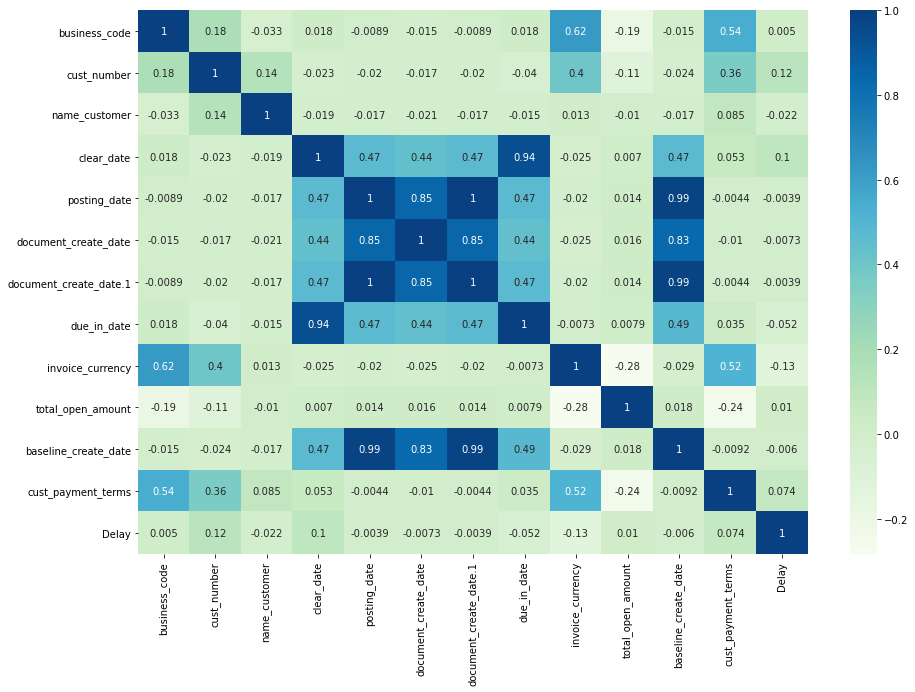

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=train1.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap="GnBu")

In [33]:
# To have a basic understanding of any continuous variable,we can just do .describe()

count    32173.000000
mean         1.122898
std         11.806637
min        -81.000000
25%         -3.000000
50%          0.000000
75%          2.000000
max        314.000000
Name: Delay, dtype: float64


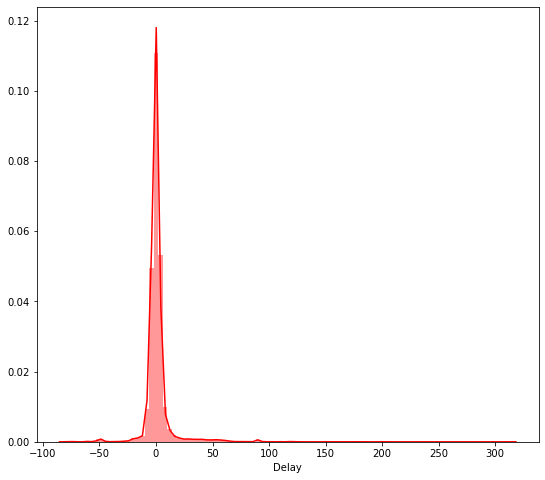

In [34]:
print(train1['Delay'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(train1['Delay'], color='r', bins=100, hist_kws={'alpha': 0.4})

Thus we infer from the graph that 'Delay' is right skewed

In [36]:
#Numerical data distribution

In [37]:
train_num = train1.select_dtypes(include = ['float64', 'int64','int32','int16','int8'])
train_num.head()

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,Delay
40898,1,774,3481,20190109,20181230,20181229,20181230,20190114,1,20011.20,20181230,32,-5
6133,1,720,3247,20190118,20181230,20181230,20181230,20190114,1,115556.82,20181230,19,4
26679,1,774,3474,20190109,20181230,20181229,20181230,20190114,1,17304.48,20181230,32,-5
37296,1,774,3476,20190110,20181230,20181230,20181230,20190114,1,7839.12,20181230,32,-4
32271,1,676,383,20190115,20181230,20181229,20181230,20190114,1,321.54,20181230,19,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002860EFCB7C8>,
      dtype=object)

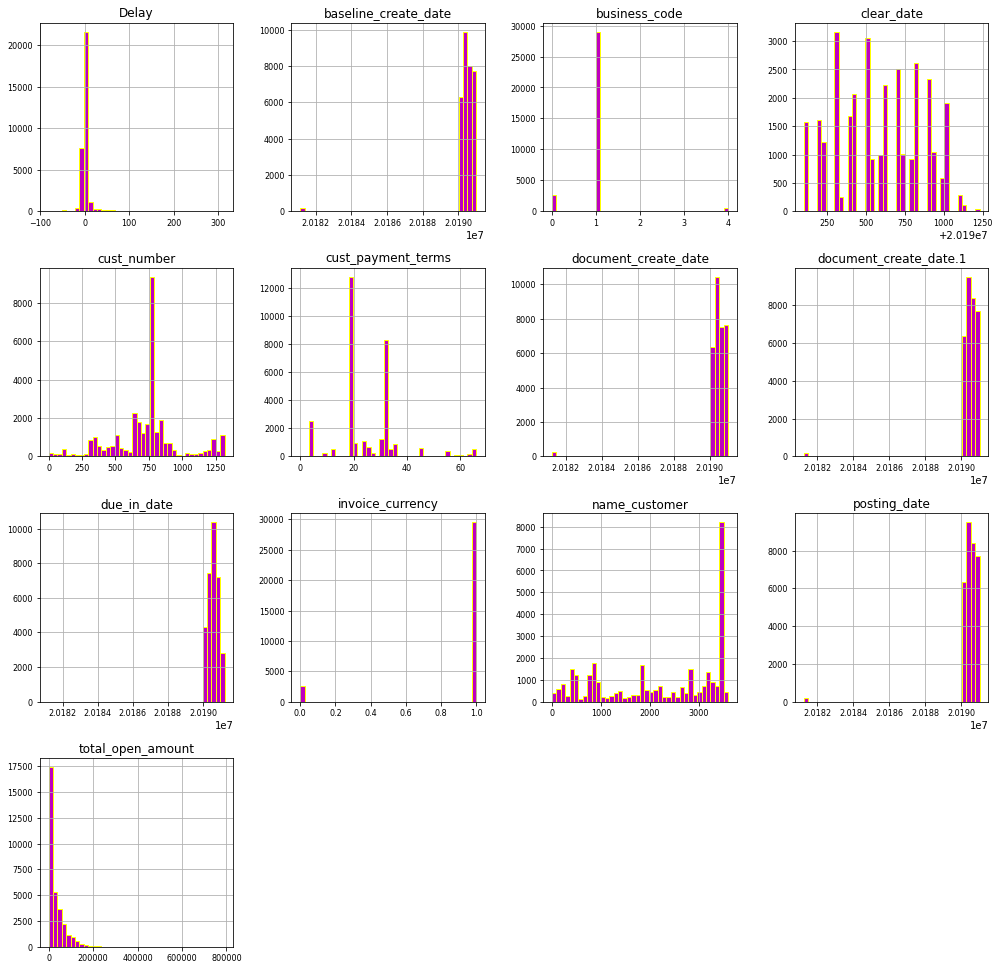

In [38]:
train_num.hist(figsize=(17, 17), bins=40, xlabelsize=8, ylabelsize=8, color='m', edgecolor='yellow')

In [39]:
#removing outliers by plotting total_open_amount vs Delay

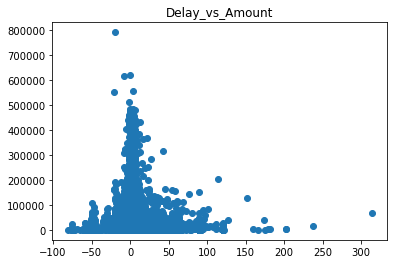

In [40]:
x=Train['Delay']
y=Train['total_open_amount']
plt.scatter(x,y)
plt.title('Delay_vs_Amount')


plt.show()

In [41]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32173 entries, 40898 to 17838
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           32173 non-null  object        
 1   cust_number             32173 non-null  object        
 2   name_customer           32173 non-null  object        
 3   clear_date              32173 non-null  datetime64[ns]
 4   doc_id                  32173 non-null  float64       
 5   posting_date            32173 non-null  object        
 6   document_create_date    32173 non-null  datetime64[ns]
 7   document_create_date.1  32173 non-null  datetime64[ns]
 8   due_in_date             32173 non-null  datetime64[ns]
 9   invoice_currency        32173 non-null  object        
 10  total_open_amount       32173 non-null  float64       
 11  baseline_create_date    32173 non-null  datetime64[ns]
 12  cust_payment_terms      32173 non-null  ob

In [42]:
train1.head()

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,Delay
40898,1,774,3481,20190109,20181230,20181229,20181230,20190114,1,20011.20,20181230,32,-5
6133,1,720,3247,20190118,20181230,20181230,20181230,20190114,1,115556.82,20181230,19,4
26679,1,774,3474,20190109,20181230,20181229,20181230,20190114,1,17304.48,20181230,32,-5
37296,1,774,3476,20190110,20181230,20181230,20181230,20190114,1,7839.12,20181230,32,-4
32271,1,676,383,20190115,20181230,20181229,20181230,20190114,1,321.54,20181230,19,1


In [43]:
Train.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
doc_id                           float64
posting_date                      object
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
Delay                              int64
dtype: object

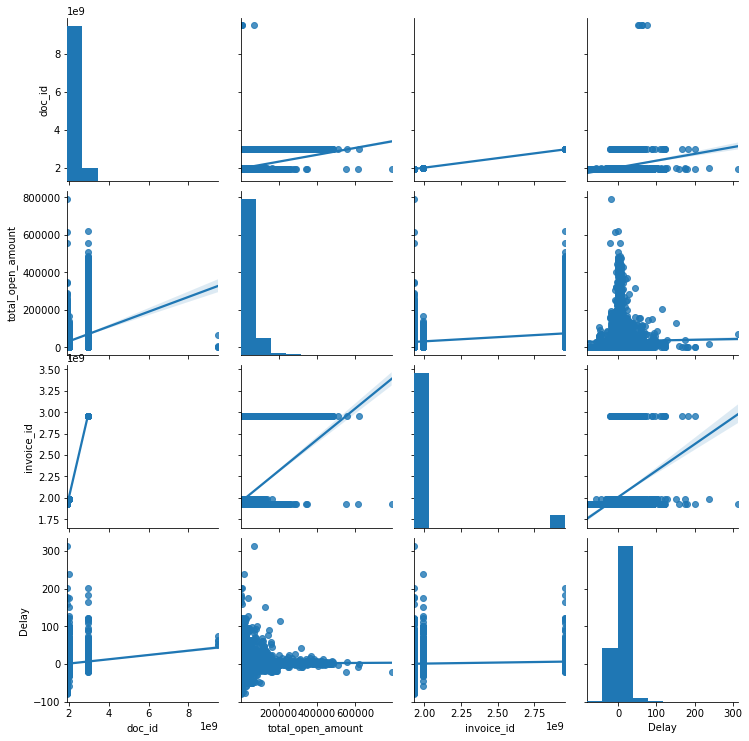

In [44]:
sns.pairplot(Train,kind='reg')

In [45]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32173 entries, 40898 to 17838
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           32173 non-null  int8   
 1   cust_number             32173 non-null  int16  
 2   name_customer           32173 non-null  int16  
 3   clear_date              32173 non-null  int32  
 4   posting_date            32173 non-null  int32  
 5   document_create_date    32173 non-null  int32  
 6   document_create_date.1  32173 non-null  int32  
 7   due_in_date             32173 non-null  int32  
 8   invoice_currency        32173 non-null  int8   
 9   total_open_amount       32173 non-null  float64
 10  baseline_create_date    32173 non-null  int32  
 11  cust_payment_terms      32173 non-null  int8   
 12  Delay                   32173 non-null  int64  
dtypes: float64(1), int16(2), int32(6), int64(1), int8(3)
memory usage: 1.7 MB


In [46]:
Train.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
doc_id                           float64
posting_date                      object
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
Delay                              int64
dtype: object

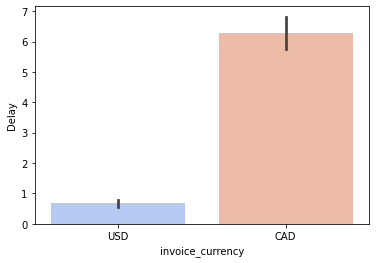

In [47]:
sns.barplot(x="invoice_currency", y="Delay",data=Train, palette="coolwarm")

It seems Companies having Invoice Currency CAD have more Delay

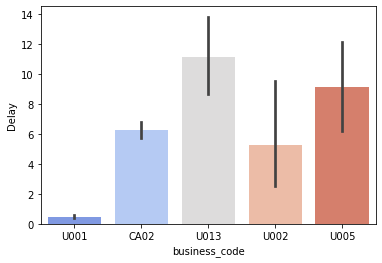

In [48]:
sns.barplot(x="business_code", y="Delay",data=Train, palette="coolwarm")

It seems Business Code U013 has the most Delay

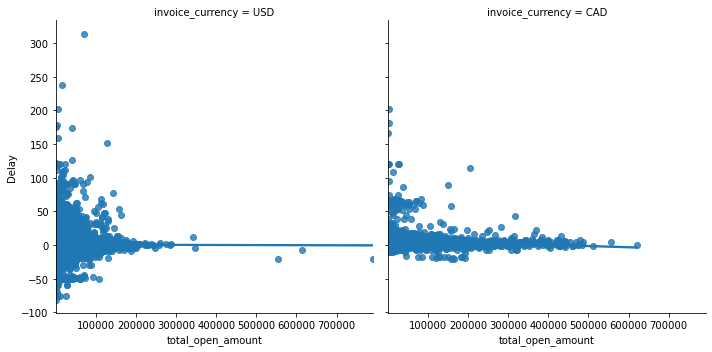

In [49]:
sns.lmplot(x='total_open_amount',y='Delay',data=Train,col='invoice_currency')

# Feature Engineering

In [50]:
Train.head()

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Delay
40898,U001,0200769623,WAL-MAR trust,2019-01-09,1.928539e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,20011.20,2018-12-30,NAH4,1.928539e+09,-5
6133,U001,0200744019,TARG,2019-01-18,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,115556.82,2018-12-30,NAA8,1.928543e+09,4
26679,U001,0200769623,WAL-MAR co,2019-01-09,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,17304.48,2018-12-30,NAH4,1.928538e+09,-5
37296,U001,0200769623,WAL-MAR corporation,2019-01-10,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,7839.12,2018-12-30,NAH4,1.928543e+09,-4
32271,U001,0200726979,BJ'S foundation,2019-01-15,1.928541e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,321.54,2018-12-30,NAA8,1.928541e+09,1


In [51]:
## Target Encoding the Categorical columns

cols = {'business_code','cust_number','name_customer','cust_payment_terms'}
for col in cols:
    target_mapper = Train.groupby(col)['Delay'].mean().to_dict()
    
    Train[col] = Train[col].map(target_mapper)
    
    Validation1[col] = Validation1[col].map(target_mapper)
    
    Validation2[col] = Validation2[col].map(target_mapper)
    
    Test[col] = Test[col].map(target_mapper)

In [52]:
Test.isnull().sum()

business_code                0
cust_number                 41
name_customer              153
clear_date                4038
doc_id                       0
posting_date                 0
document_create_date         0
document_create_date.1       0
due_in_date                  0
invoice_currency             0
total_open_amount            0
baseline_create_date         0
cust_payment_terms           4
invoice_id                   0
dtype: int64

In [53]:
test_null_cols = {'cust_number','name_customer','cust_payment_terms'}
for col in test_null_cols:
    Validation1[col] = Validation1[col].fillna(Validation1[col].mean())
    Validation2[col] = Validation2[col].fillna(Validation2[col].mean())
    Test[col] = Test[col].fillna(Test[col].mean())

In [54]:
##dropping columns of no use

drop_cols = ['clear_date','doc_id','posting_date','document_create_date','invoice_currency','baseline_create_date','invoice_id']
for col in drop_cols:
    Train.drop(col, axis=1, inplace = True)
    Validation1.drop(col, axis=1, inplace = True)
    Validation2.drop(col, axis=1, inplace = True)
    Test.drop(col, axis=1, inplace = True)

In [55]:
# Splitting date time into date,month,year

Train['dcd_1_year'] = Train['document_create_date.1'].dt.year
Train['dcd_1_month'] = Train['document_create_date.1'].dt.month
Train['dcd_1_date'] = Train['document_create_date.1'].dt.day
Train['did_year'] = Train['due_in_date'].dt.year
Train['did_month'] = Train['due_in_date'].dt.month
Train['did_date'] = Train['due_in_date'].dt.day
Train.head()

Train.drop(columns = ['document_create_date.1','due_in_date'],axis=1,inplace=True)

In [56]:
# splitting date time into date,month,year
Test['dcd_1_year'] = Test['document_create_date.1'].dt.year
Test['dcd_1_month'] = Test['document_create_date.1'].dt.month
Test['dcd_1_date'] = Test['document_create_date.1'].dt.day
Test['did_year'] = Test['due_in_date'].dt.year
Test['did_month'] = Test['due_in_date'].dt.month
Test['did_date'] = Test['due_in_date'].dt.day
Test.head()

Test.drop(columns = ['document_create_date.1','due_in_date'],axis=1,inplace=True)

In [57]:
# splitting date time into date,month,year
Validation1['dcd_1_year'] = Validation1['document_create_date.1'].dt.year
Validation1['dcd_1_month'] = Validation1['document_create_date.1'].dt.month
Validation1['dcd_1_date'] = Validation1['document_create_date.1'].dt.day
Validation1['did_year'] = Validation1['due_in_date'].dt.year
Validation1['did_month'] = Validation1['due_in_date'].dt.month
Validation1['did_date'] = Validation1['due_in_date'].dt.day
Validation1.head()

Validation1.drop(columns = ['document_create_date.1','due_in_date'],axis=1,inplace=True)

In [58]:
# splitting date time into date,month,year
Validation2['dcd_1_year'] = Validation2['document_create_date.1'].dt.year
Validation2['dcd_1_month'] = Validation2['document_create_date.1'].dt.month
Validation2['dcd_1_date'] = Validation2['document_create_date.1'].dt.day
Validation2['did_year'] = Validation2['due_in_date'].dt.year
Validation2['did_month'] = Validation2['due_in_date'].dt.month
Validation2['did_date'] = Validation2['due_in_date'].dt.day
Validation2.head()

Validation2.drop(columns = ['document_create_date.1','due_in_date'],axis=1,inplace=True)

In [59]:
# ## Normalization on train

# names4 = Train.columns
# d4 = scaler.fit_transform(Train)
# Train = pd.DataFrame(d4, columns = names4)
# Train


In [60]:
# ## Normalization on validation1

# names1 = Validation1.columns
# d1 = scaler.fit_transform(Validation1)
# Validation1 = pd.DataFrame(d1, columns = names1)
# Validation1

In [61]:
# ## Normalization on validation2

# names2 = Validation2.columns
# d2 = scaler.fit_transform(Validation2)
# Validation2 = pd.DataFrame(d2, columns = names2)
# Validation2

In [62]:
# ## Normalization on Test

# names3 = Test.columns
# d3 = scaler.fit_transform(Test)
# Test = pd.DataFrame(d3, columns = names3)
# Test

In [63]:
##Shifting the Target towards the end

#X = Train.iloc[:,:-7]
#Y = Train.iloc[:, -7]
#Z = Train.iloc[:, -6:]
#Train_latest = pd.merge(X, Z, left_index=True, right_index=True)
#Train =  pd.merge(Train_latest, Y, left_index=True, right_index=True)
#Train

# X1 = Validation1.iloc[:,:-7]
# Y1 = Validation1.iloc[:, -7]
# Z1 = Validation1.iloc[:, -6:]
# Validation1_latest = pd.merge(X1, Z1, left_index=True, right_index=True)
# Validation1 =  pd.merge(Validation1_latest, Y1, left_index=True, right_index=True)
# Validation1

# X2 = Validation2.iloc[:,:-7]
# Y2 = Validation2.iloc[:, -7]
# Z2 = Validation2.iloc[:, -6:]
# Validation2_latest = pd.merge(X2, Z2, left_index=True, right_index=True)
# Validation2 =  pd.merge(Validation2_latest, Y2, left_index=True, right_index=True)
# Validation2



In [64]:
Train.head()

,business_code,cust_number,name_customer,total_open_amount,cust_payment_terms,Delay,dcd_1_year,dcd_1_month,dcd_1_date,did_year,did_month,did_date
40898,0.489835,-2.213811,-2.489209,20011.20,-1.894013,-5,2018,12,30,2019,1,14
6133,0.489835,2.939778,2.012821,115556.82,1.436364,4,2018,12,30,2019,1,14
26679,0.489835,-2.213811,-1.943343,17304.48,-1.894013,-5,2018,12,30,2019,1,14
37296,0.489835,-2.213811,-2.261062,7839.12,-1.894013,-4,2018,12,30,2019,1,14
32271,0.489835,0.849089,1.059322,321.54,1.436364,1,2018,12,30,2019,1,14


# Feature Selection

In [65]:
#Using Filter Methods
corrr = Train.corr()

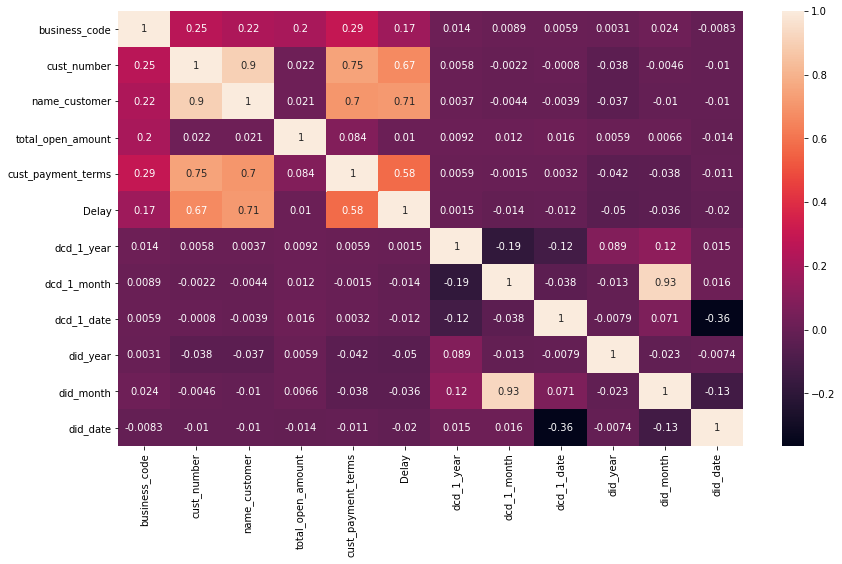

In [66]:
plt.figure(figsize=(14,8))
sns.heatmap(corrr,annot=True)

In [67]:
def handling_correlation(df,threshold=0.8):
    # creating set to hold the correlated features
    corr_features = set()
    # create the correlation matrix (default to pearson)
    corr_matrix = df.corr()
    #code for selecting all correleated features
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

In [68]:
#in the time of checking co-relation we have to check with target also that's why I am passing out output_label also
handling_correlation(Train.copy(),0.80)

['name_customer', 'did_month']

In [69]:
Train.drop(columns = ['dcd_1_month','name_customer'],axis=1,inplace=True)

In [70]:
Validation1.drop(columns = ['dcd_1_month','name_customer'],axis=1,inplace=True)
Validation2.drop(columns = ['dcd_1_month','name_customer'],axis=1,inplace=True)
Test.drop(columns = ['dcd_1_month','name_customer'],axis=1,inplace=True)

In [71]:
## Wrapper methods

In [72]:
# x1_train, x1_test, y1_train, y1_test = train_test_split(Train.drop(columns = ['Delay'],axis=1), Train.Delay)
# print(x1_train.shape,y1_train.shape)
# print(x1_test.shape,y1_test.shape)

In [73]:
# def FFS(X,y):
#     from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#     from sklearn.linear_model import LinearRegression
#     # Sequential Forward Selection(sfs)
#     sfs = SFS(LinearRegression(),
#               k_features=8,
#               forward=True,
#               scoring = 'r2',
#               cv = 5)
   
#    # LinearRegression() is an estimator for the entire process. Similarly, it can be any classification based algorithm.

#   #  k_features indicates the number of feature

#     sfs.fit(X, y)#doing the FFS
    
#     return sfs.k_feature_names_

# FFS(x1_train,y1_train)#features selected by FFS

In [74]:
# ## deleting unecessary features 

# Train.drop(columns = ['dcd_1_year'],axis=1,inplace=True)
# Validation1.drop(columns = ['dcd_1_year'],axis=1,inplace=True)
# Validation2.drop(columns = ['dcd_1_year'],axis=1,inplace=True)
# Test.drop(columns = ['dcd_1_year'],axis=1,inplace=True)

In [75]:
Train

,business_code,cust_number,total_open_amount,cust_payment_terms,Delay,dcd_1_year,dcd_1_date,did_year,did_month,did_date
40898,0.489835,-2.213811,20011.200000,-1.894013,-5,2018,30,2019,1,14
6133,0.489835,2.939778,115556.820000,1.436364,4,2018,30,2019,1,14
26679,0.489835,-2.213811,17304.480000,-1.894013,-5,2018,30,2019,1,14
37296,0.489835,-2.213811,7839.120000,-1.894013,-4,2018,30,2019,1,14
32271,0.489835,0.849089,321.540000,1.436364,1,2018,30,2019,1,14
...,...,...,...,...,...,...,...,...,...,...
16381,0.489835,-6.718391,3961.720000,1.001575,-5,2019,7,2019,10,27
2559,0.489835,2.377682,123048.690000,1.436364,0,2019,7,2019,10,22
22219,6.271605,5.716578,70220.728597,6.365042,5,2019,7,2019,10,25
28305,0.489835,-6.718391,2603.640000,1.436364,0,2019,7,2019,10,22


In [76]:
#Embedded columns
# X = Train.iloc[:,:-7]
# Y = Train.iloc[:, -7]
# Z = Train.iloc[:, -6:]
# Train_latest = pd.merge(X, Z, left_index=True, right_index=True)
# Train =  pd.merge(Train_latest, Y, left_index=True, right_index=True)
# Train

In [77]:
# Train.shape

In [78]:
# x=Train.iloc[:,:8].values
# y=Train.iloc[:,8].values
# x.shape,y.shape

In [79]:
# x_train,x_test,y_train,y_test=train_test_split(x,y)
# print(x_train.shape,y_train.shape)
# print(x_test.shape,y_test.shape)

In [80]:
# x_train = pd.DataFrame(x_train, columns = ['business_code','cust_number','total_open_amount','dcd_1_date','did_year','did_month','did_date','cust_payment_terms'])
# y_train = pd.DataFrame(y_train, columns = ['Delay'])

In [81]:
# def tree_based_feature_importance(x_train,y_train):
#     from sklearn.ensemble import RandomForestRegressor
#     # create the random forest model
#     model = RandomForestRegressor(n_estimators=120)
#     # fit the model to start training.
#     model.fit(x_train, y_train)

#     # get the importance of the resulting features.
#     importances = model.feature_importances_

#     # create a data frame for visualization.
#     final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
    
#     #visualising feature importance
#     pd.Series(model.feature_importances_, index=x_train.columns).nlargest(6).plot(kind='barh')  
#     return final_df
# feature_importance=tree_based_feature_importance(x_train,y_train)#features importance data frame

In [82]:
# feature_importance.sort_values(by='Importances',ascending=False)

In [83]:
# # Droping features on the basis of Trainset

# Train.drop(columns = ['dcd_1_date','cust_payment_terms'],axis=1,inplace=True)
# Validation1.drop(columns = ['dcd_1_date','cust_payment_terms'],axis=1,inplace=True)
# Validation2.drop(columns = ['dcd_1_date','cust_payment_terms'],axis=1,inplace=True)
# Test.drop(columns = ['dcd_1_date','cust_payment_terms'],axis=1,inplace=True)

In [84]:
Train.shape

(32173, 10)

# Model for Train

In [168]:
#Splitting Data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Train.drop(columns = ['Delay'],axis=1), Train.Delay)

In [169]:
# Shape of the X_train and X_test
print(X_train.shape)
print(X_test.shape)

(24129, 9)
(8044, 9)


In [170]:
# Defining Lists to Store in the Results and Names of Algorithms
MSE_Score = []
R2_Score = []
Algorithm = []
RMSE_Score = []


In [171]:
# Fitting Simple Linear Regression to the Training Set
Algorithm.append('Linear Regression')
clf = LinearRegression()
clf.fit(X_train, y_train)

# # Predicting the Test Set Results
predicted = clf.predict(X_test)

# # Fitting Linear Regression to the Training Set
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, predicted))
print("MSE:", metrics.mean_squared_error(y_test, predicted))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print("r2_score:", metrics.r2_score(y_test, predicted))

MAE: 3.4387843563433758
MSE: 76.21233671848945
RMSE: 8.72996773868549
r2_score: 0.47051908036416124


In [172]:
# # Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_test, predicted))
RMSE_Score.append(np.sqrt(mean_squared_error(y_test, predicted)))
R2_Score.append(r2_score(y_test, predicted))

In [173]:
# Fitting SVR to the Training Set
Algorithm.append('Support Vector Regression')
clf = SVR()
clf.fit(X_train, y_train)


# # Predicting the Test Set Results
predicted1 = clf.predict(X_test)

# # Fitting SVR to the Training Set
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, predicted1))
print("MSE:", metrics.mean_squared_error(y_test, predicted1))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predicted1)))
print("r2_score:", metrics.r2_score(y_test, predicted1))#Test Set Results

MAE: 4.91029198692021
MSE: 144.91450120093143
RMSE: 12.038043910907263
r2_score: -0.006785340382079008


In [174]:
# # Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_test, predicted1))
RMSE_Score.append(np.sqrt(mean_squared_error(y_test, predicted1)))
R2_Score.append(r2_score(y_test, predicted1))

In [175]:
# # Fitting Decision Tree to the Training Set
Algorithm.append('Decision Tree Regressor')
clf2 = DecisionTreeRegressor()
clf2.fit(X_train, y_train)

# # Predicting the Test Set Results
predicted2 = clf2.predict(X_test)

# # Fitting Decision Tree to the Training Set
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, predicted2))
print("MSE:", metrics.mean_squared_error(y_test, predicted2))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predicted2)))
print("r2_score:", metrics.r2_score(y_test, predicted2))

MAE: 3.709286424664346
MSE: 122.06088388861264
RMSE: 11.048116757557038
r2_score: 0.15198887954807072


In [176]:
# # Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_test, predicted2))
RMSE_Score.append(np.sqrt(mean_squared_error(y_test, predicted2)))
R2_Score.append(r2_score(y_test, predicted2))

In [177]:
# # Fitting Random Forest Regressor Tree to the Training Set
Algorithm.append('Random Forest Regressor')
clf3 = RandomForestRegressor()
clf3.fit(X_train, y_train)

# # Predicting the Test Set Results
predicted3 = clf3.predict(X_test)

# # Fitting Random Forest to the Training Set
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, predicted3))
print("MSE:", metrics.mean_squared_error(y_test, predicted3))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predicted3)))
print("r2_score:", metrics.r2_score(y_test, predicted3))

MAE: 3.096266383107196
MSE: 75.42980937826543
RMSE: 8.68503364289773
r2_score: 0.4759556450147434


In [178]:
# # Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_test, predicted3))
RMSE_Score.append(np.sqrt(mean_squared_error(y_test, predicted3)))
R2_Score.append(r2_score(y_test, predicted3))

In [179]:
# # Fitting XGBoost Regressor to the Training Set
Algorithm.append('XGB Regressor')
clf4 = xgb.XGBRegressor()
clf4.fit(X_train, y_train)

# # Predicting the Test Set Results
predicted4 = clf4.predict(X_test)

# # Fitting XGBoost to the Training Set
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, predicted4))
print("MSE:", metrics.mean_squared_error(y_test, predicted4))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predicted4)))
print("r2_score:", metrics.r2_score(y_test, predicted4))

MAE: 3.186312642713526
MSE: 75.54608331263829
RMSE: 8.69172499062403
r2_score: 0.4751478384003257


In [180]:
# # Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_test, predicted4))
RMSE_Score.append(np.sqrt(mean_squared_error(y_test, predicted4)))
R2_Score.append(r2_score(y_test, predicted4))

In [181]:
# Just Combining the Lists into a DataFrame for a Better Visualisation
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score, RMSE_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score', 'RMSE Score'])
# Score Card
Comparison

,Algorithm,MSE_Score,R2_Score,RMSE Score
0,Linear Regression,76.212337,0.470519,8.729968
1,Support Vector Regression,144.914501,-0.006785,12.038044
2,Decision Tree Regressor,122.060884,0.151989,11.048117
3,Random Forest Regressor,75.429809,0.475956,8.685034
4,XGB Regressor,75.546083,0.475148,8.691725


## Tuning the parameters by applying Randomized SearchCV on Validation 1 set

In [100]:
#Splitting Data into Train and Test
from sklearn.model_selection import train_test_split
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(Validation1.drop(columns = ['Delay'],axis=1),Validation1.Delay)

In [102]:
 from sklearn.model_selection import RandomizedSearchCV

In [103]:
# Number of trees to be used
xgb_n_estimators = [int(x) for x in np.linspace(100, 2000, 10)]

# Maximum number of levels in tree
xgb_max_depth = [int(x) for x in np.linspace(2, 20, 10)]

# Minimum number of instaces needed in each node
xgb_min_child_weight = [int(x) for x in np.linspace(1, 10, 10)]

# Tree construction algorithm used in XGBoost
xgb_tree_method = ['auto', 'exact', 'approx', 'hist', 'gpu_hist']

# Learning rate
xgb_eta = [x for x in np.linspace(0.1, 0.6, 6)]

# Minimum loss reduction required to make further partition
xgb_gamma = [int(x) for x in np.linspace(0, 0.5, 6)]

# Learning objective used
xgb_objective = ['reg:squarederror', 'reg:squaredlogerror']

# Create the grid
xgb_grid = {'n_estimators': xgb_n_estimators,
            'max_depth': xgb_max_depth,
            'min_child_weight': xgb_min_child_weight,
            'tree_method': xgb_tree_method,
            'eta': xgb_eta,
            'gamma': xgb_gamma,
            'objective': xgb_objective}

In [104]:
# Create the model to be tuned
xgb_base = xgb.XGBRegressor()

# Create the random search Random Forest
xgb_random = RandomizedSearchCV(estimator = xgb_base, param_distributions = xgb_grid, 
                                n_iter = 10, cv = 3, verbose = 2, 
                                random_state = 420, n_jobs = -1)

# Fit the random search model
xgb_random.fit(X_train_val, y_train_val)

# Get the optimal parameters
xgb_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
C:\Users\KIIT\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.8min finished


{'tree_method': 'gpu_hist',
 'objective': 'reg:squarederror',
 'n_estimators': 2000,
 'min_child_weight': 4,
 'max_depth': 2,
 'gamma': 0,
 'eta': 0.1}

In [105]:
# # Fitting XGBoost Regressor to the Training Set
Algorithm.append('XGB Regressor')
clf5 = xgb.XGBRegressor(tree_method= 'gpu_hist',
 objective= 'reg:squarederror',
 n_estimators= 2000,
 min_child_weight= 4,
 max_depth= 2,
 gamma= 0,
 eta= 0.1)
clf5.fit(X_train, y_train)

# # Predicting the Test Set Results
predicted8 = clf5.predict(X_test)

# # Fitting XGBoost to the Training Set
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, predicted8))
print("MSE:", metrics.mean_squared_error(y_test, predicted8))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predicted8)))
print("r2_score:", metrics.r2_score(y_test, predicted8))

MAE: 3.1147661768585397
MSE: 63.20704539299437
RMSE: 7.950285868633553
r2_score: 0.531608788723161


# Model for Test

In [106]:
clf10 = xgb.XGBRegressor(tree_method= 'gpu_hist',
 objective= 'reg:squarederror',
 n_estimators= 2000,
 min_child_weight= 4,
 max_depth= 2,
 gamma= 0,
 eta= 0.1)
clf10.fit(X_train, y_train)
test_predicted = clf10.predict(Test)


In [107]:
test_predicted = pd.Series(test_predicted)
Test['Delay_predicted'] = test_predicted.values
Test.Delay_predicted.max()

77.7276

In [108]:
Test['due_date'] = Test['did_date'].astype(str) + Test['did_month'].astype(str) + Test['did_year'].astype(str)


In [109]:
Test['due_date'] = Test['due_date'].astype(str).astype(int)

In [110]:
Test.dtypes

business_code         float64
cust_number           float64
total_open_amount     float64
cust_payment_terms    float64
dcd_1_year              int64
dcd_1_date              int64
did_year                int64
did_month               int64
did_date                int64
Delay_predicted       float32
due_date                int32
dtype: object

In [111]:
Test['due_date'] = pd.to_datetime(Test['due_date'].astype(str), format='%d%m%Y')
Test['due_date']

49757   2020-03-13
49642   2020-03-13
46563   2020-03-18
49741   2020-03-13
47410   2020-03-13
           ...    
47865   2020-05-23
49738   2020-05-28
48458   2020-05-28
48517   2020-05-16
47900   2020-06-02
Name: due_date, Length: 4038, dtype: datetime64[ns]

In [112]:
Test.head()

,business_code,cust_number,total_open_amount,cust_payment_terms,dcd_1_year,dcd_1_date,did_year,did_month,did_date,Delay_predicted,due_date
49757,0.489835,-2.213811,42357.12,-1.894013,2020,27,2020,3,13,-3.081467,2020-03-13
49642,0.489835,6.297297,10876.30,1.436364,2020,27,2020,3,13,5.525013,2020-03-13
46563,0.489835,0.454082,1281.84,1.001575,2020,27,2020,3,18,1.091485,2020-03-18
49741,0.489835,0.478075,20817.26,0.440724,2020,27,2020,3,13,0.564411,2020-03-13
47410,0.489835,2.034483,31799.16,1.436364,2020,27,2020,3,13,2.098844,2020-03-13


In [113]:
Test['Delay_predicted'] = Test['Delay_predicted'].apply(np.ceil) 
Test['Delay_predicted']=Test['Delay_predicted'].astype(int)
Test.head()

,business_code,cust_number,total_open_amount,cust_payment_terms,dcd_1_year,dcd_1_date,did_year,did_month,did_date,Delay_predicted,due_date
49757,0.489835,-2.213811,42357.12,-1.894013,2020,27,2020,3,13,-3,2020-03-13
49642,0.489835,6.297297,10876.30,1.436364,2020,27,2020,3,13,6,2020-03-13
46563,0.489835,0.454082,1281.84,1.001575,2020,27,2020,3,18,2,2020-03-18
49741,0.489835,0.478075,20817.26,0.440724,2020,27,2020,3,13,1,2020-03-13
47410,0.489835,2.034483,31799.16,1.436364,2020,27,2020,3,13,3,2020-03-13


In [114]:
Test.dtypes

business_code                float64
cust_number                  float64
total_open_amount            float64
cust_payment_terms           float64
dcd_1_year                     int64
dcd_1_date                     int64
did_year                       int64
did_month                      int64
did_date                       int64
Delay_predicted                int32
due_date              datetime64[ns]
dtype: object

In [115]:
Test['Delay_predicted']=pd.to_timedelta(Test['Delay_predicted'])
Test['Delay_predicted']

49757   -1 days +23:59:59.999999
49642            00:00:00.000000
46563            00:00:00.000000
49741            00:00:00.000000
47410            00:00:00.000000
                  ...           
47865            00:00:00.000000
49738   -1 days +23:59:59.999999
48458                   00:00:00
48517            00:00:00.000000
47900            00:00:00.000000
Name: Delay_predicted, Length: 4038, dtype: timedelta64[ns]

In [116]:
Test['clear_date']= Test['due_date']+Test['Delay_predicted']

Test

,business_code,cust_number,total_open_amount,cust_payment_terms,dcd_1_year,dcd_1_date,did_year,did_month,did_date,Delay_predicted,due_date,clear_date
49757,0.489835,-2.213811,42357.120000,-1.894013,2020,27,2020,3,13,-1 days +23:59:59.999999,2020-03-13,2020-03-12 23:59:59.999999997
49642,0.489835,6.297297,10876.300000,1.436364,2020,27,2020,3,13,00:00:00.000000,2020-03-13,2020-03-13 00:00:00.000000006
46563,0.489835,0.454082,1281.840000,1.001575,2020,27,2020,3,18,00:00:00.000000,2020-03-18,2020-03-18 00:00:00.000000002
49741,0.489835,0.478075,20817.260000,0.440724,2020,27,2020,3,13,00:00:00.000000,2020-03-13,2020-03-13 00:00:00.000000001
47410,0.489835,2.034483,31799.160000,1.436364,2020,27,2020,3,13,00:00:00.000000,2020-03-13,2020-03-13 00:00:00.000000003
...,...,...,...,...,...,...,...,...,...,...,...,...
47865,6.271605,4.207746,54128.684335,6.365042,2020,13,2020,5,23,00:00:00.000000,2020-05-23,2020-05-23 00:00:00.000000004
49738,0.489835,-5.275862,4816.560000,1.436364,2020,13,2020,5,28,-1 days +23:59:59.999999,2020-05-28,2020-05-27 23:59:59.999999997
48458,0.489835,-1.125000,17319.800000,1.436364,2020,13,2020,5,28,00:00:00,2020-05-28,2020-05-28 00:00:00.000000000
48517,6.271605,6.000000,1830.535200,6.000000,2020,16,2020,5,16,00:00:00.000000,2020-05-16,2020-05-16 00:00:00.000000008


In [117]:
Test['clear_date'].dt.date

49757    2020-03-12
49642    2020-03-13
46563    2020-03-18
49741    2020-03-13
47410    2020-03-13
            ...    
47865    2020-05-23
49738    2020-05-27
48458    2020-05-28
48517    2020-05-16
47900    2020-06-02
Name: clear_date, Length: 4038, dtype: object

In [118]:
Test

,business_code,cust_number,total_open_amount,cust_payment_terms,dcd_1_year,dcd_1_date,did_year,did_month,did_date,Delay_predicted,due_date,clear_date
49757,0.489835,-2.213811,42357.120000,-1.894013,2020,27,2020,3,13,-1 days +23:59:59.999999,2020-03-13,2020-03-12 23:59:59.999999997
49642,0.489835,6.297297,10876.300000,1.436364,2020,27,2020,3,13,00:00:00.000000,2020-03-13,2020-03-13 00:00:00.000000006
46563,0.489835,0.454082,1281.840000,1.001575,2020,27,2020,3,18,00:00:00.000000,2020-03-18,2020-03-18 00:00:00.000000002
49741,0.489835,0.478075,20817.260000,0.440724,2020,27,2020,3,13,00:00:00.000000,2020-03-13,2020-03-13 00:00:00.000000001
47410,0.489835,2.034483,31799.160000,1.436364,2020,27,2020,3,13,00:00:00.000000,2020-03-13,2020-03-13 00:00:00.000000003
...,...,...,...,...,...,...,...,...,...,...,...,...
47865,6.271605,4.207746,54128.684335,6.365042,2020,13,2020,5,23,00:00:00.000000,2020-05-23,2020-05-23 00:00:00.000000004
49738,0.489835,-5.275862,4816.560000,1.436364,2020,13,2020,5,28,-1 days +23:59:59.999999,2020-05-28,2020-05-27 23:59:59.999999997
48458,0.489835,-1.125000,17319.800000,1.436364,2020,13,2020,5,28,00:00:00,2020-05-28,2020-05-28 00:00:00.000000000
48517,6.271605,6.000000,1830.535200,6.000000,2020,16,2020,5,16,00:00:00.000000,2020-05-16,2020-05-16 00:00:00.000000008


In [119]:
Test.dtypes

business_code                 float64
cust_number                   float64
total_open_amount             float64
cust_payment_terms            float64
dcd_1_year                      int64
dcd_1_date                      int64
did_year                        int64
did_month                       int64
did_date                        int64
Delay_predicted       timedelta64[ns]
due_date               datetime64[ns]
clear_date             datetime64[ns]
dtype: object

In [120]:
Test['clear_date'] = pd.to_datetime(Test['clear_date']).dt.date
#Removing time stamp 

In [121]:
Test.head()

,business_code,cust_number,total_open_amount,cust_payment_terms,dcd_1_year,dcd_1_date,did_year,did_month,did_date,Delay_predicted,due_date,clear_date
49757,0.489835,-2.213811,42357.12,-1.894013,2020,27,2020,3,13,-1 days +23:59:59.999999,2020-03-13,2020-03-12
49642,0.489835,6.297297,10876.30,1.436364,2020,27,2020,3,13,00:00:00.000000,2020-03-13,2020-03-13
46563,0.489835,0.454082,1281.84,1.001575,2020,27,2020,3,18,00:00:00.000000,2020-03-18,2020-03-18
49741,0.489835,0.478075,20817.26,0.440724,2020,27,2020,3,13,00:00:00.000000,2020-03-13,2020-03-13
47410,0.489835,2.034483,31799.16,1.436364,2020,27,2020,3,13,00:00:00.000000,2020-03-13,2020-03-13


In [128]:
Test['Delay_predicted']=pd.to_timedelta(Test['Delay_predicted'])
Test['clear_date'] = Test['due_date'] + Test['Delay_predicted']

In [129]:
Test['Delay_predicted'] = test_predicted.values

In [131]:
Test['Delay_predicted'] = Test['Delay_predicted'].apply(np.ceil) 

In [132]:
Test['Delay_predicted']

49757   -3.0
49642    6.0
46563    2.0
49741    1.0
47410    3.0
        ... 
47865    4.0
49738   -3.0
48458   -0.0
48517    8.0
47900    1.0
Name: Delay_predicted, Length: 4038, dtype: float32

In [133]:
Test['Delay_predicted'] = Test['Delay_predicted'].astype(int)

In [134]:
Test['Delay_predicted']

49757   -3
49642    6
46563    2
49741    1
47410    3
        ..
47865    4
49738   -3
48458    0
48517    8
47900    1
Name: Delay_predicted, Length: 4038, dtype: int32

In [138]:
#Creating different Aging Buckets
Test['Aging_bucket'] =""
Test.loc[Test['Delay_predicted'].apply(int) > 60, 'Aging_bucket'] = '>60'
Test.loc[(Test['Delay_predicted'].apply(int) >= 46) & (Test['Delay_predicted'].apply(int) <= 60),'Aging_bucket'] = '46-60'
Test.loc[(Test['Delay_predicted'].apply(int) >= 31) & (Test['Delay_predicted'].apply(int) <= 45),'Aging_bucket'] = '31-45'
Test.loc[(Test['Delay_predicted'].apply(int) <= 30) & (Test['Delay_predicted'].apply(int) >= 16),'Aging_bucket'] = '16-30'
Test.loc[(Test['Delay_predicted'].apply(int) <= 15) & (Test['Delay_predicted'].apply(int) > 0),'Aging_bucket'] = '0-15'
Test.loc[Test['Delay_predicted'].apply(int) <= 0, 'Aging_bucket'] = 'No Delay'

## Final Dataset with predicted dates and classified into the Aging buckets

In [139]:
#Final Set with Aging Bucket
Test.head()

,business_code,cust_number,total_open_amount,cust_payment_terms,dcd_1_year,dcd_1_date,did_year,did_month,did_date,Delay_predicted,due_date,clear_date,Aging_bucket
49757,0.489835,-2.213811,42357.12,-1.894013,2020,27,2020,3,13,-3,2020-03-13,2020-03-12 23:59:59.999999997,No Delay
49642,0.489835,6.297297,10876.30,1.436364,2020,27,2020,3,13,6,2020-03-13,2020-03-13 00:00:00.000000006,0-15
46563,0.489835,0.454082,1281.84,1.001575,2020,27,2020,3,18,2,2020-03-18,2020-03-18 00:00:00.000000002,0-15
49741,0.489835,0.478075,20817.26,0.440724,2020,27,2020,3,13,1,2020-03-13,2020-03-13 00:00:00.000000001,0-15
47410,0.489835,2.034483,31799.16,1.436364,2020,27,2020,3,13,3,2020-03-13,2020-03-13 00:00:00.000000003,0-15
